# Linear Regression to Predict Stock Trend

In [ ]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import math
import numpy as np

Importing Files and viewing CSV files

In [257]:
dfAAPL= pd.read_csv('E:\Siraj\AAPL.csv')

In [258]:
dfBA = pd.read_csv('E:\Siraj\BA.csv')

In [259]:
dfBA.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-04,126.379997,126.750000,125.260002,125.459999,109.537010,2975300
1,2014-09-05,125.430000,125.550003,124.099998,124.690002,108.864731,4913800
2,2014-09-08,125.900002,128.250000,125.900002,127.980003,111.737183,6103500
3,2014-09-09,127.809998,128.679993,127.620003,128.210007,111.937996,4866400
4,2014-09-10,128.470001,128.470001,127.480003,128.220001,111.946716,3068200


In [260]:
dfIBM = pd.read_csv('E:\Siraj\IBM.csv')

In [261]:
dfIBM.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-04,191.690002,192.690002,190.059998,190.679993,154.411606,2865000
1,2014-09-05,190.529999,191.750000,190.089996,191.199997,154.832687,2260200
2,2014-09-08,190.750000,191.199997,189.509995,190.139999,153.974335,2524200
3,2014-09-09,190.339996,190.740005,189.779999,189.990005,153.852829,2403600
4,2014-09-10,190.119995,192.149994,190.100006,191.539993,155.108063,2764000


In [262]:
dfTSLA = pd.read_csv('E:\Siraj\TSLA.csv')

In [263]:
dfMSFT = pd.read_csv('E:\Siraj\MSFT.csv')

In [264]:
dfinal = pd.DataFrame()

Dividing The Label and training Dataset

In [265]:
dfinal['Date'] = dfIBM['Date']

In [266]:
dfinal['Apple'] = dfAAPL['Adj Close']

In [267]:
dfinal['Tesla'] = dfTSLA['Adj Close']

In [268]:
dfinal['Microsoft'] = dfMSFT['Adj Close']

In [269]:
dfinal['IBM'] = dfIBM['Adj Close']

In [270]:
dfinal['Boeing'] = dfBA['Adj Close']

In [306]:
dfinal.head()
time = dfinal['Date']

In [ ]:
Finding Correlation between different Stocks

In [272]:
dx = dfinal.drop(['Date'], axis = 1)
retscomp = dx.pct_change()

corr = retscomp.corr()

In [273]:
corr

,Apple,Tesla,Microsoft,IBM,Boeing
Apple,1.000000,0.312255,0.572023,0.394214,0.424372
Tesla,0.312255,1.000000,0.324366,0.251898,0.265162
Microsoft,0.572023,0.324366,1.000000,0.479011,0.429892
IBM,0.394214,0.251898,0.479011,1.000000,0.397232
Boeing,0.424372,0.265162,0.429892,0.397232,1.000000


#Most stock show positive trend, leading to the conclusion that rise in one stock can affect to rise of another

Text(0, 0.5, 'Returns GE')

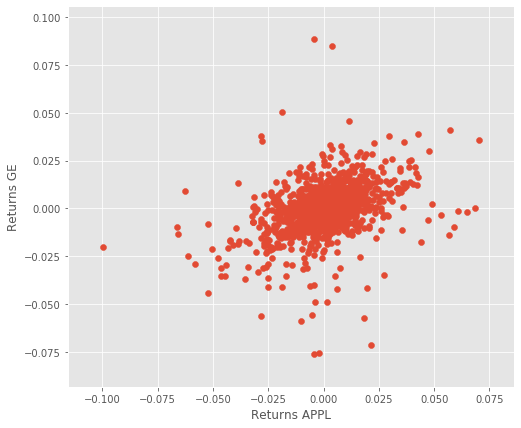

In [274]:
plt.scatter(retscomp.Apple, retscomp.IBM)
plt.xlabel('Returns APPL')
plt.ylabel('Returns GE')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A9EBEB780>,
      dtype=object)

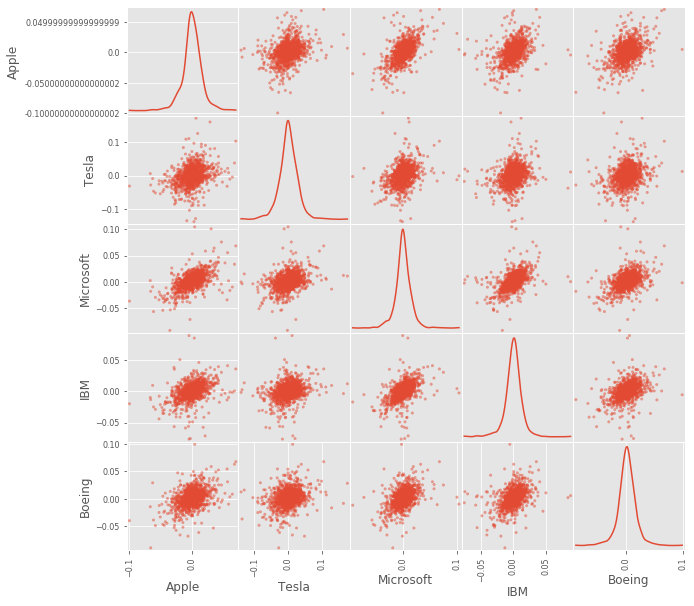

In [275]:
scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10))

([<matplotlib.axis.YTick at 0x22a9f7ee588>,
 <a list of 5 Text yticklabel objects>)

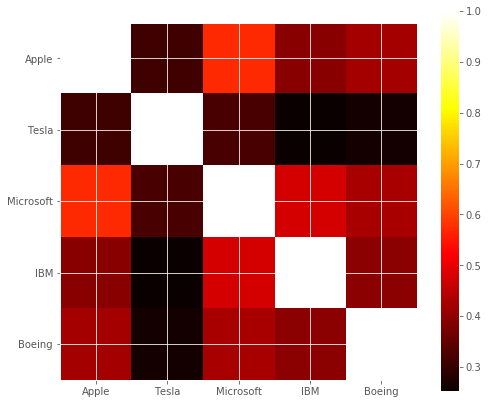

In [276]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

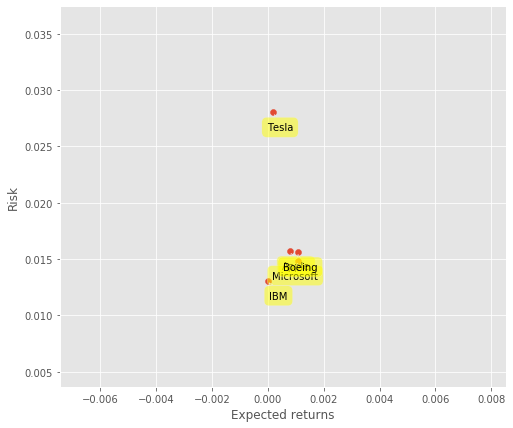

In [277]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x , y in zip(retscomp.columns, retscomp.mean(),
retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# We pick Tesla's Stock to proceed with our study

Feature engineering for our training data

In [278]:
dfreg = dfTSLA.loc[:,['Adj Close', 'Volume']]

In [279]:
dfreg['HL_PCT'] = (dfTSLA['High'] - dfTSLA['Low'] )/ dfTSLA['Close'] * 100.00

In [280]:
dfreg['PCT_change'] = (dfTSLA['Close'] - dfTSLA['Open']) / dfTSLA['Open'] * 100.00

In [281]:
dfreg.isnull().values.any()

False

In [282]:
forecast_out = int(math.ceil(0.01 * len(dfreg)))

In [284]:
np.where(np.isnan(dp))

(array([], dtype=int64), array([], dtype=int64))

In [285]:
dx.isnull().values.any()

False

Making labels

In [286]:
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col]
X = np.array(dfreg.drop(['label'], 1))

In [287]:
y = np.array(dfreg['label'])


In [288]:
X1= X[:1100,:]
forcastX = X[1100:,:]

In [345]:
y1= y[:1100]
forcasty = y[1100:]

In [346]:
len(y1)

1100

In [360]:
from sklearn import preprocessing
X1 = preprocessing.scale(X1)

In [361]:
time1 = time[:1100]

In [362]:
time2 = time[1100:]

Applying different Models

In [363]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [364]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X1, y1, test_size=0.33, random_state=42)

In [365]:
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())


In [366]:
clfpoly2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [367]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [368]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [369]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)


In [370]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
tips = sns.load_dataset("tips")

Printing the Score

In [389]:
print(confidenceknn)
print(confidencepoly2)
print(confidencepoly3)
print(confidenceknn)

0.9614004226035799
0.9999967298309833
0.9999287793489618
0.9614004226035799


In [381]:
forcastX = preprocessing.scale(forcastX)

In [384]:
lenght = forcastX.shape[0]

In [385]:
yknn = clfknn.predict(forcastX)

In [374]:
len(forcasty)

159

Original Trend

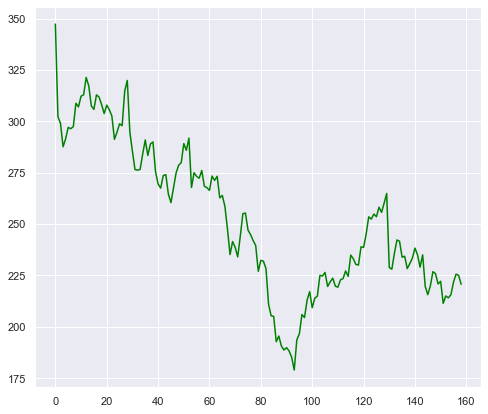

In [375]:

plt.plot(forcasty, color='green')


Forcasted Trend

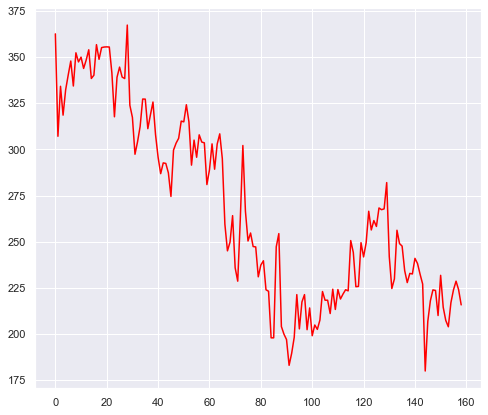

In [386]:
plt.plot(yknn, color='red')

In [387]:
freg = clfreg.predict(forcastX)

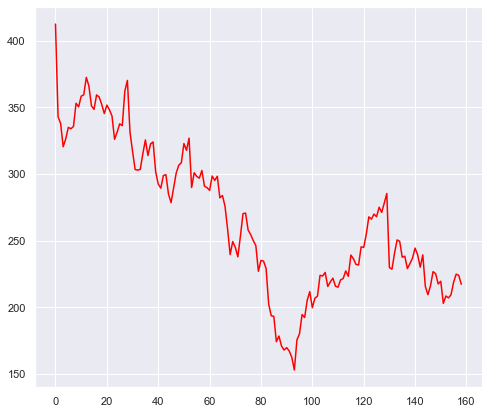

In [388]:
plt.plot(freg, color='red')